<a href="https://colab.research.google.com/github/Alexander-1380/Yandex_practicum/blob/main/Analysis_app's_business_metrics/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B1%D0%B8%D0%B7%D0%BD%D0%B5%D1%81_%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ бизнес-показателей приложения (проект выполнен в рамках обучения в Яндекс Практикуме)

### Описание проекта

Задача — разобраться в причинах убытков рекламных кампаний развлекательного приложения.<br>

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,<br>
- выгрузка их покупок за этот период,<br>
- рекламные расходы.<br>

Необходимо изучить:<br>
- откуда приходят пользователи и какими устройствами они пользуются,<br>
- сколько стоит привлечение пользователей из различных рекламных каналов;<br>
- сколько денег приносит каждый клиент,<br>
- когда расходы на привлечение клиента окупаются,<br>
- какие факторы мешают привлечению клиентов.<br>


### Описание данных

В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
- <b>User Id</b> — уникальный идентификатор пользователя,
- <b>Region</b> — страна пользователя,
- <b>Device</b> — тип устройства пользователя,
- <b>Channel</b> — идентификатор источника перехода,
- <b>Session Start</b> — дата и время начала сессии,
- <b>Session End</b> — дата и время окончания сессии.

Структура orders_info_short.csv:
- <b>User Id</b> — уникальный идентификатор пользователя,
- <b>Event Dt</b> — дата и время покупки,
- <b>Revenue</b> — сумма заказа.

Структура costs_info_short.csv:
- <b>dt</b> — дата проведения рекламной кампании,
- <b>Channel</b> — идентификатор рекламного источника,
- <b>costs</b> — расходы на эту кампанию.



In [ ]:
# загружаем библиотеки

import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# загружаем данные

try:
    visits = pd.read_csv('/Users/alexander/Jupiter Notebooks/YandexCourse/Sprint12_project/visits_info_short.csv')
    orders = pd.read_csv('/Users/alexander/Jupiter Notebooks/YandexCourse/Sprint12_project/orders_info_short.csv')
    costs = pd.read_csv('/Users/alexander/Jupiter Notebooks/YandexCourse/Sprint12_project/costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

data_list = [visits, orders, costs]

# выведем данные
for df in data_list:
    display(df.head())


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [ ]:
# для удобства приведем все названия всех столбцов к нижнему регистру
# а также заменим пробелы в названиях на нижние подчеркивания

for df in data_list:
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')

In [ ]:
# проверяем данные на наличие пропусков и дубликатов

for df in data_list:
    print('количество пропусков: ')
    print(df.isna().sum())
    print('количество дубликатов: ', df.duplicated().sum(), end='\n\n')

количество пропусков: 
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
количество дубликатов:  0

количество пропусков: 
user_id     0
event_dt    0
revenue     0
dtype: int64
количество дубликатов:  0

количество пропусков: 
dt         0
channel    0
costs      0
dtype: int64
количество дубликатов:  0



пропуски в данных отсутствуют, дубликаты в данных отсутствуют

In [ ]:
# преобразовуем типы данных о времени

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [ ]:
# проверим форматы данных всех столбцов

for df in data_list:
    print(df.dtypes, end='\n\n')

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

dt          object
channel     object
costs      float64
dtype: object



Типы данных во всех колонках соответствуют сохранённым в них значениям

  В исходных данных обнаружены столбцы, содержащие информацию о времени и дате в формате не соответствующем сожержанию. С помощью метода to_datetime в таблице visits столбы 'session_start' и 'session_end', а также столбец 'event_dt' таблицы orders были переведены в формат datetime64[ns]. <br>
Столбец 'dt' таблицы costs должен представлять дату и переведен в формат object


### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [ ]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
    #    if event in events['event_name'].unique():
    #        profiles[event] = profiles['user_id'].isin(
    #            events.query('event_name == @event')['user_id'].unique()
    #        )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [ ]:
# функция расчета удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
# функция для расчета конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
# функция для LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC,
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [ ]:
# для сглаживания фрейма с недельным окном

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

window = 7

In [ ]:
# для визуализации удержания (включает функцию сглаживания)

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

In [ ]:
#  для визуализации конверсии (включает функцию сглаживания)

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [ ]:
# для визуализации LTV и ROI (включает функцию сглаживания)

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [ ]:
# составим профили пользователей

profiles = get_profiles(visits, orders, costs)
display(profiles.head(), profiles.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


None

In [ ]:
# Определим минимальную и максимальную даты привлечения пользователей

print('минимальная дата привлечения - ', min(profiles['dt']))
print('максимальная дата привлечения - ', max(profiles['dt']))

минимальная дата привлечения -  2019-05-01
максимальная дата привлечения -  2019-10-27


In [ ]:
# посмотрим разбивку пользователей по странам

display(profiles.groupby('region').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by='payer', ascending=False))

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


Наибольшее количество пользователей 100002 из США, доля платящих также наибольшая ~ 6,9%<br>

Показатели остальных стран примерно одного порядка:<br>
Германия - 14981 пользователей, доля платящих ~ 4,1%<br>
Великобритания - 17575 пользователей, доля платящих ~ 4,0%<br>
Франциия - 17450 пользователей, доля платящих ~ 3,8%<br>

In [ ]:
# посмотрим разбивку пользователей по устройствам

display(profiles.groupby('device').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by='payer', ascending=False))

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


Mac - 30042 пользователей, доля платящих ~ 6,4%<br>
iPhone - 54479 пользователей , доля платящих ~ 6,2%<br>
Android - 35032 пользователей, доля платящих ~ 5,8%<br>
PC - 30455 пользователей, доля платящих ~ 5,0%<br>

Можем сделать вывод, что среди пользователей экосистемы устройств компании Apple доля платящих выше чем других систем.

In [ ]:
# посмотрим разбивку пользователей по каналам привлечения

display(profiles.groupby('channel').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by='payer', ascending=False))

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


Наибольшее количество пользователей пришло "органическим" путем без рекламных компаний, однако доля платящих среди них наименьшая.<br>

Из платных каналов наилучшие показатели у FaceBoom - наибольшее количество пользователей 29144 и наибольшая доля платящих ~ 12.2%<br>
На втором месте TipTop - 19561 пользователей, доля платящих ~ 9.6%<br>

Отдельно отметим качество привлеченных пользователей по каналам AdNonSense и lambdaMediaAds - доли 11.3% и 10.4% соответственно. Однако количество пользователей из этих каналов сравнительно невелико - 3880 и 2149, возможно рекламные компании по этим каналам следует расширить.<br>

Рекламным компаниям в остальных каналах есть над чем работать. Количества пришедших из них пользователей от 4312 до 8605, при долях платящих 2.7 - 7.9%<br>

## Промежуточные выводы 1

## Исследовательский анализ данных

На исследованном промежутке времени между:<br>
минимальной дата привлечения пользователей -  2019-05-01<br>
максимальной дата привлечения пользователей -  2019-10-27<br>
у приложения Procrastinate Pro+ было 150004 активных пользователя.<br>

### По странам:
Наибольшее количество пользователей 100002 из США, доля платящих также наибольшая ~ 6,9%<br>
Показатели остальных стран примерно одного порядка:<br>
Германия - 14981 пользователей, доля платящих ~ 4,1%<br>
Великобритания - 17575 пользователей, доля платящих ~ 4,0%<br>
Франциия - 17450 пользователей, доля платящих ~ 3,8%<br>

### По устройствам:
Mac - 30042 пользователей, доля платящих ~ 6,4%<br>
iPhone - 54479 пользователей, доля платящих ~ 6,2%<br>
Android - 35032 пользователей, доля платящих ~ 5,8%<br>
PC - 30455 пользователей, доля платящих ~ 5,0%<br>


Можем сделать вывод, что среди пользователей экосистемы устройств компании Apple доля платящих выше чем других систем.<br>

### По каналам привлечения пользователей:
Наибольшее количество пользователей пришло "органическим" путем без рекламных компаний, однако доля платящих среди них наименьшая.<br>

Из платных каналов наилучшие показатели у FaceBoom - наибольшее количество пользователей 29144 и наибольшая доля платящих ~ 12.2%<br>
На втором месте TipTop - 19561 пользователей, доля платящих ~ 9.6%<br>

Отдельно отметим качество привлеченных пользователей по каналам AdNonSense и lambdaMediaAds - доли 11.3% и 10.4% соответственно. Однако количество пользователей из этих каналов сравнительно невелико - 3880 и 2149, возможно рекламные компании по этим каналам следует расширить.<br>

Рекламным компаниям в остальных каналах есть над чем работать. Количества пришедших из них пользователей от 4312 до 8605, при долях платящих 2.7 - 7.9%<br>

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [ ]:
# Посчитаем общую сумму расходов на маркетинг

print(costs['costs'].sum())

105497.30000000002


Всего на рекламные компании по всем каналам за исследуемый период было потрачено 105497.3 условных единиц

In [ ]:
# по рекламным источникам

costs_report = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
costs_report['rate, %'] = costs_report['costs'] / costs['costs'].sum() * 100
costs_report

,costs,"rate, %"
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


в разбивке по каналам привлечения с болшим отрывом лидируют сети TipTop и FaceBoom на них приходится 51.9% и 30.7% всех затрат. На остальные 8 каналов приходится по 0.9-4.9% затрат

In [ ]:
# для визуализации динамики изменения расходов по неделям и месяцам добавим в таблицу costs столбцы недель и месяцев

costs['dt']
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

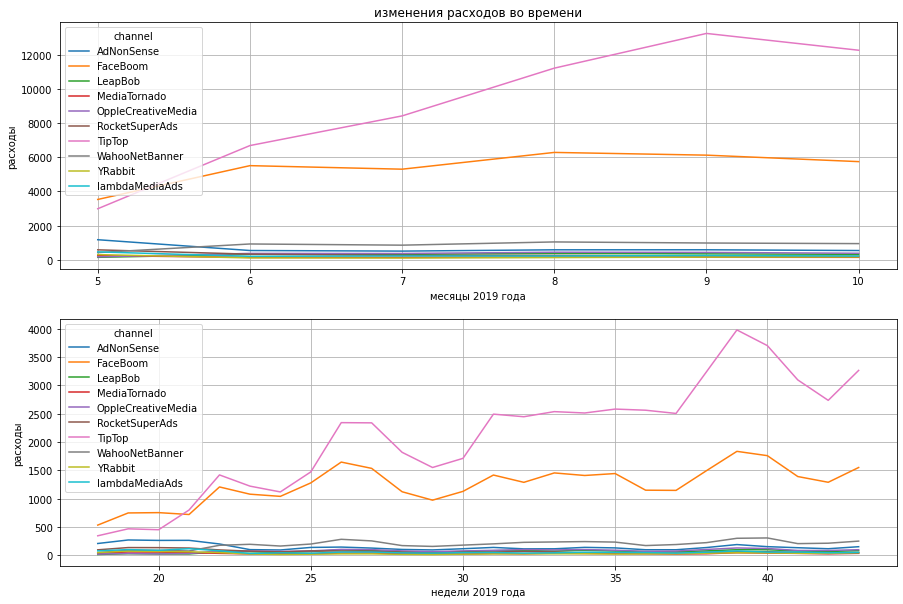

In [ ]:
# построим графики

costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(15, 10), ax=plt.subplot(2,1,1))
plt.ylabel('расходы')
plt.xlabel('месяцы 2019 года')
plt.title('изменения расходов во времени')

costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(15, 10), ax=plt.subplot(2,1,2))
plt.ylabel('расходы')
plt.xlabel('недели 2019 года')

plt.show()

Наблюдаем, что затраты на все каналы кроме FaceBoom и TipTop практически не изменялись во времени.
Затраты на FaceBoom увеличились в июне по отношению к маю, но затем оставались в пределах одного диапазона.

Затраты же на TipTop постоянно растут. Эффективность этих затрат попробуем выяснить далее

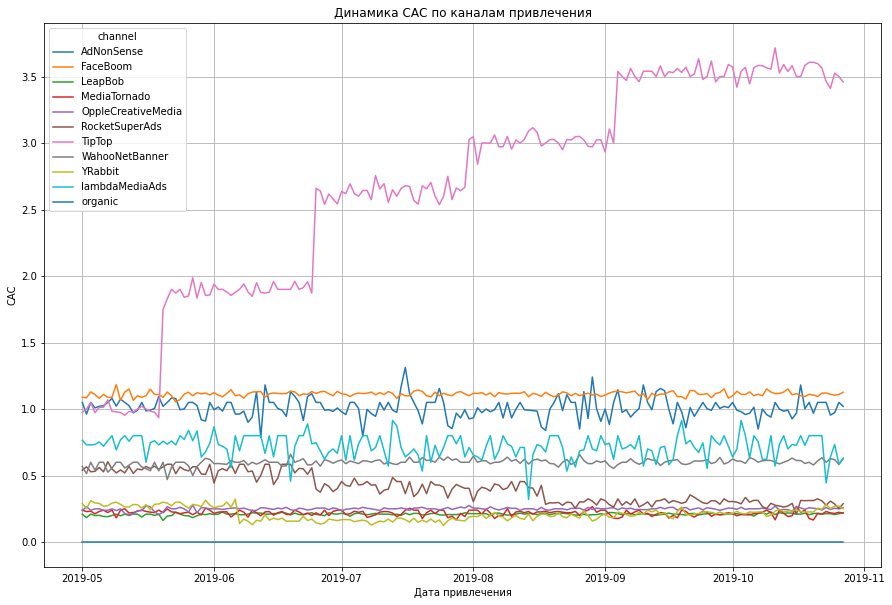

In [ ]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [ ]:
profiles.query('channel != "organic"').pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean').sort_values(
    by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Самая высокая средняя стоимость привлечения одного пользователя на канале TipTop ~ 2.8
FaceBoom ~ 1.1
AdNonSense ~ 1.0
Остальные стоимости распределены от 0.21 до 0.72

Также по графику динамики наблюдаем аномалию по каналу TipTop - средняя стоимость привлечения одного пользователя скачкообразно растет от месяца к месяцу от 1.0 в мае до 3.5 в сентябре-октябре.

## промежуточные выводы 2:

## Маркетинговое исследование

Всего на рекламные компании по всем каналам за исследуемый период было потрачено 105497.3 условных единиц.<br>

В разбивке <b>по каналам привлечения</b> с болшим отрывом лидируют сети TipTop и FaceBoom на них приходится 51.9% и 30.7% всех затрат. <br>
На остальные 8 каналов приходится по 0.9-4.9% затрат.<br>

Наблюдаем, что затраты на все каналы кроме FaceBoom и TipTop практически не изменялись во времени. <br>
Затраты на FaceBoom увеличились в июне по отношению к маю, но затем оставались в пределах одного диапазона.<br>
Затраты же на TipTop постоянно растут. Эффективность этих затрат попробуем выяснить далее.<br>

Самая высокая средняя стоимость привлечения одного пользователя на канале TipTop ~ 2.8<br>
FaceBoom ~ 1.1 <br>
AdNonSense ~ 1.0<br>
Остальные стоимости распределены от 0.21 до 0.72 <br>

Также по графику динамики наблюдаем аномалию по каналу TipTop - средняя стоимость привлечения одного пользователя скачкообразно растет от месяца к месяцу от 1.0 в мае до 3.5 в сентябре-октябре.<br>

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

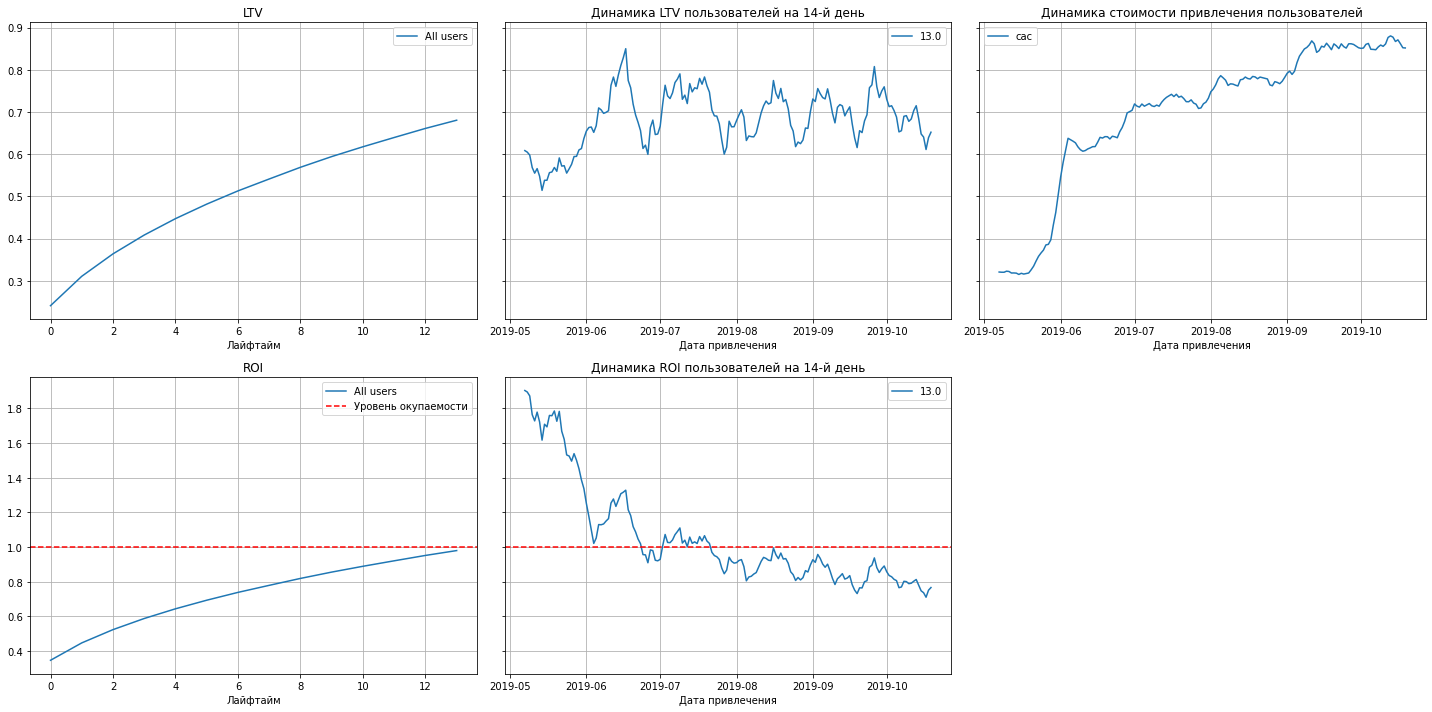

In [ ]:
# посмотрим на бизнес-показатели LTV и ROI
# Зададим момент анализа 1 ноября 2019 года, и зададим горизонт анализа 14 дней.

observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

# построим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

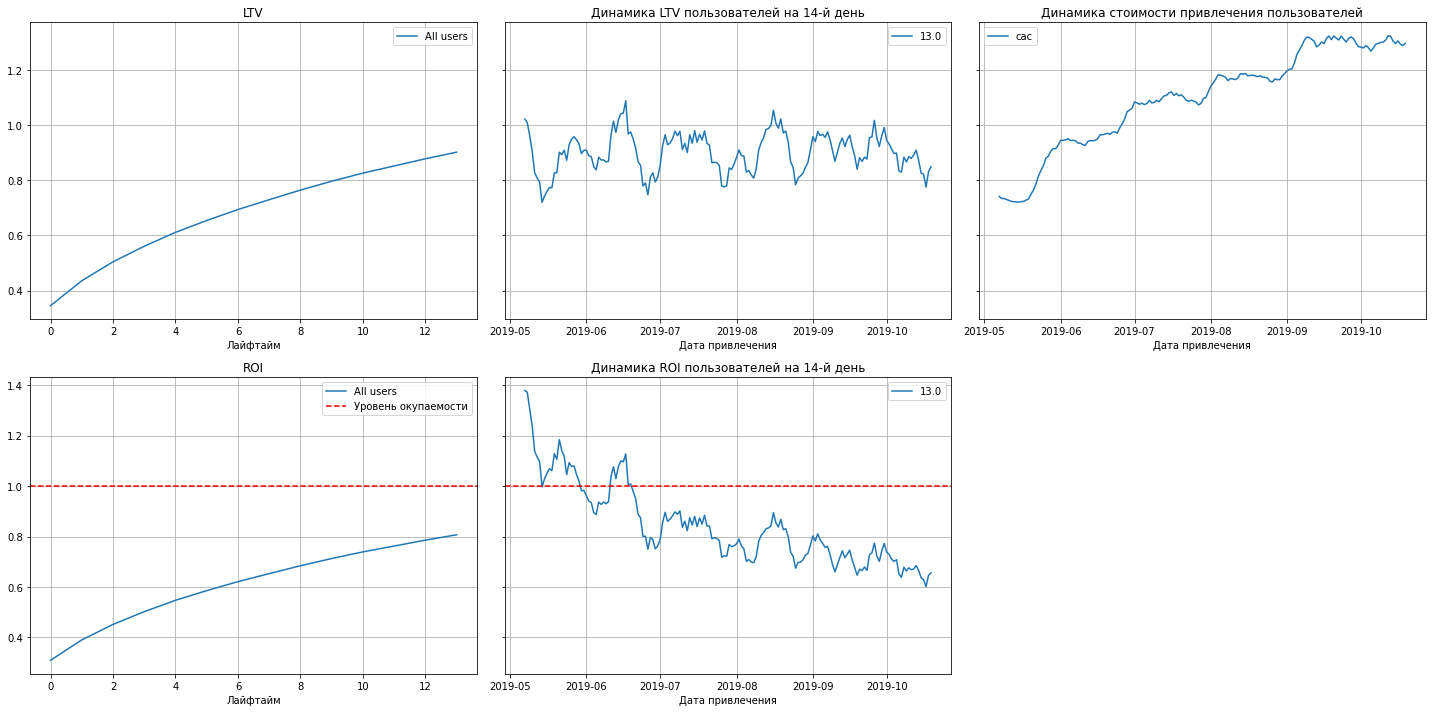

In [ ]:
# посмотрим на бизнес-показатели LTV и ROI
# Зададим момент анализа 1 ноября 2019 года, и зададим горизонт анализа 14 дней.

observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

# построим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Наблюдаем:<br>
- отсутствие окупаемости (ROI 0.8 к 14-му дню)
- показатель LTV экспоненциально растет на протяжении нужного лайфтайма, проблем не наблюдается
- на динамику LTV по месяцам отмечаются колебания, но в целом показатель стабилен
- стоимость привлечения странным образом растет, нужно изучить проблему
- динамика окупаемости 14-го дня падает по мере того как растет стоимость привлечения пользователя, и переходит в зону ниже уровня окупаемости 5 и 6 месяцем. Скорее всего проблема именно в CAC.


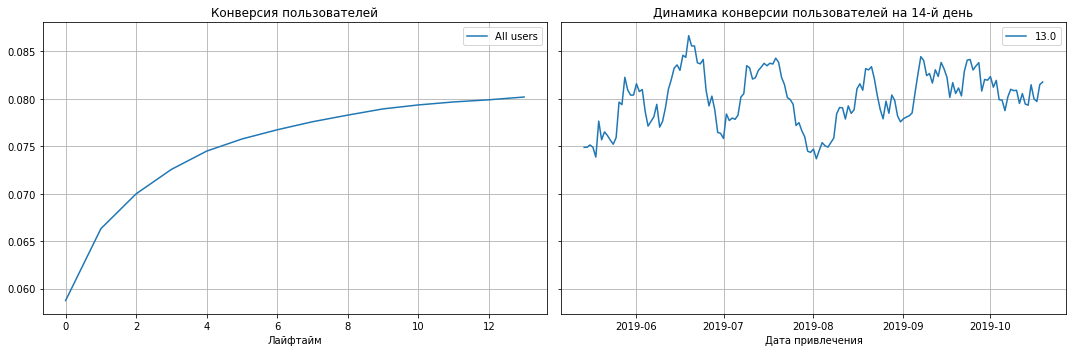

In [ ]:
# Проверим конверсию пользователей и динамику её изменения.

conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('channel != "organic"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

# построим графики

plot_conversion(conversion, conversion_history, horizon_days, window=14)

Конверсия плавно экспоненциально растет от начального значения (1-го дня) в направлении единицы. Динамика конверсии стабильна

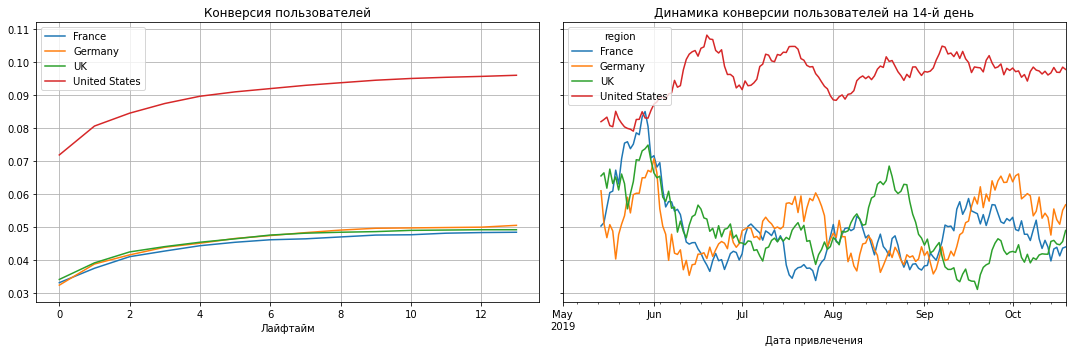

In [ ]:
# Проверим конверсию пользователей и динамику её изменения в разбивке по регионам.

conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('channel != "organic"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

# построим графики

plot_conversion(conversion, conversion_history, horizon_days, window=14)

В разбивке конверсии по регионам :<br>
Самую мощную конверсию демонстрируют пользователи из США, примерно в два раза превышает других. Остальные регионы на одном уровне.

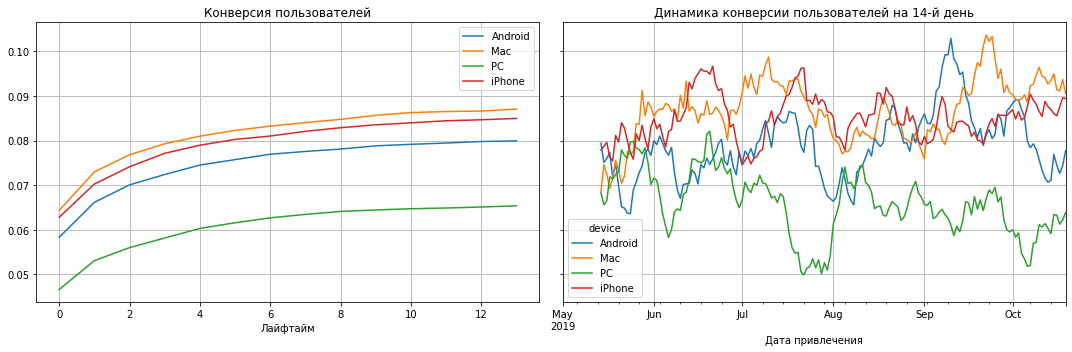

In [ ]:
# Проверим конверсию пользователей и динамику её изменения в разбивке по устройствам.

conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('channel != "organic"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

# построим графики

plot_conversion(conversion, conversion_history, horizon_days, window=14)

В разбивке конверсии по устройствам:<br>
Наблюдаем явно плохую по сравнению с другими конверсию пользователей PC. Информацию для передачи в маркетинговый отдел, может что-то не так с отображением рекламы на этой платформе.

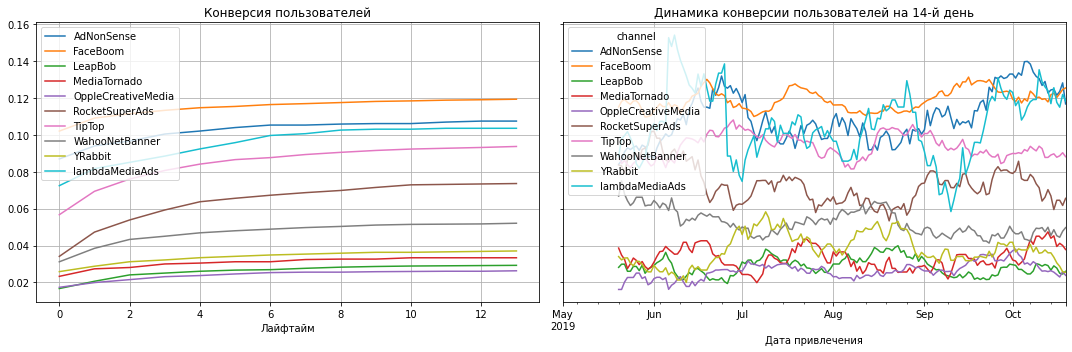

In [ ]:
# Проверим конверсию пользователей и динамику её изменения в разбивке по каналам.

conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('channel != "organic"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

# построим графики

plot_conversion(conversion, conversion_history, horizon_days, window=20)

в разбивке конверсии по каналам продвижения:
- группа лидеров - FaceBoom, AdNonSence, lambdaMediaAds, TipTop,<br>
- группа "середнячков" - RocketSuperAds и WahooNetBanner<br>
- группа аутсайдеров - YRabbit, MediaTornado, LeapBob, OppleCreativeMedia<br>
В последней группе необходимо работать над повышением конверсии.

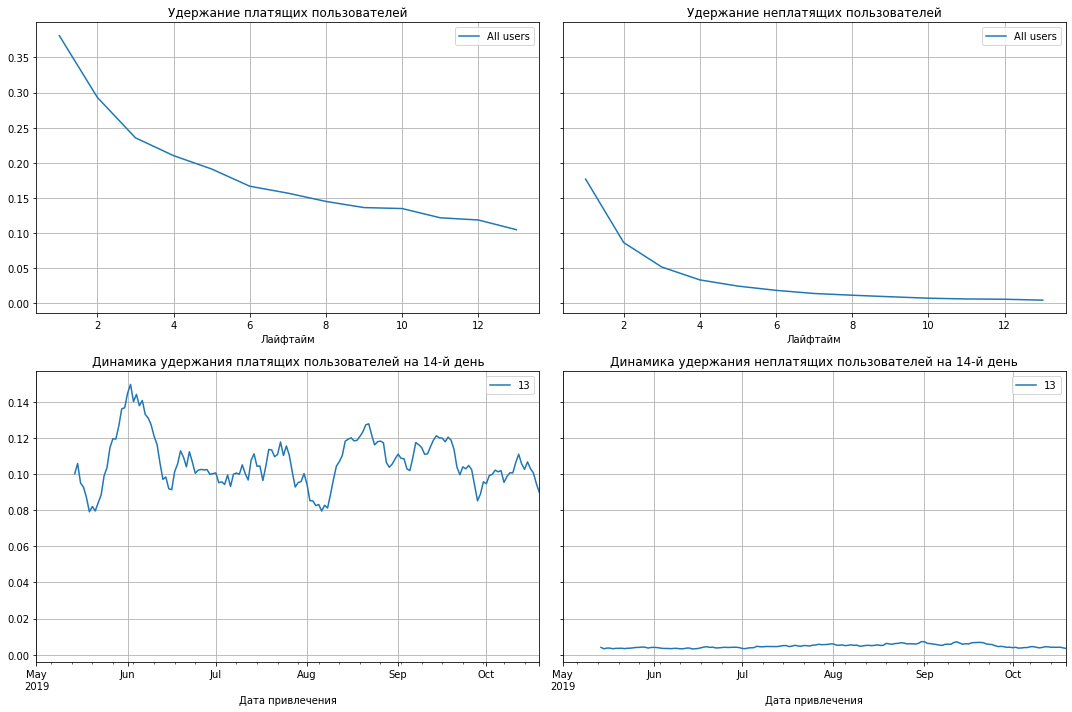

In [ ]:
# Проверим удержание пользователей и динамику его изменения.

retention_raw, retention, retention_history = get_retention(
    profiles.query('channel != "organic"'),
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)


plot_retention(retention, retention_history, horizon_days, window=14)

Удержание плавно снижается по схожей с экспоненциальной кривой, линия для неплатящих пользователей лежит ниже линии для платящих, аномалий не наблюдается.

Диинамика удержания более-менее стабильна, но все же посмотрим на нее в разбивке на устройства и каналам привлечения, так как не очень ровный график вызвал подозрения.

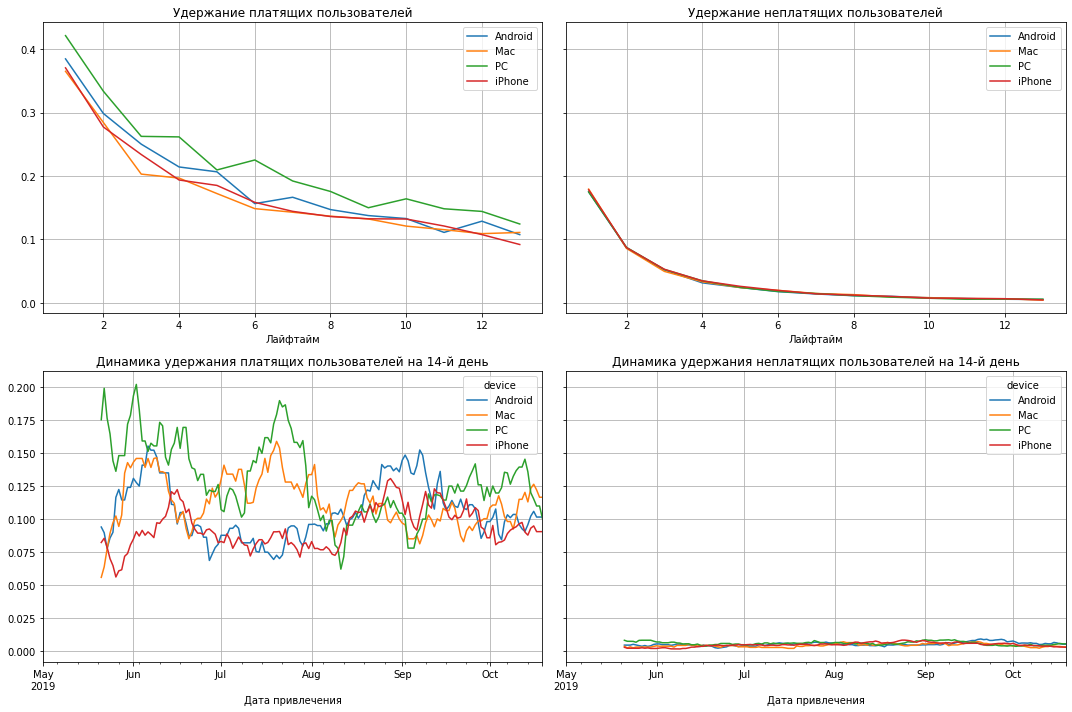

In [ ]:
# посмотрим удержание в разбивке по устройствам, исключив органических пользователей

retention_raw, retention, retention_history = get_retention(
    profiles.query('channel != "organic"'),
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)


plot_retention(retention, retention_history, horizon_days, window=21)

Особой разницы по устройствам не наблюдается, для всех устройств удержание находится в одном диапазоне

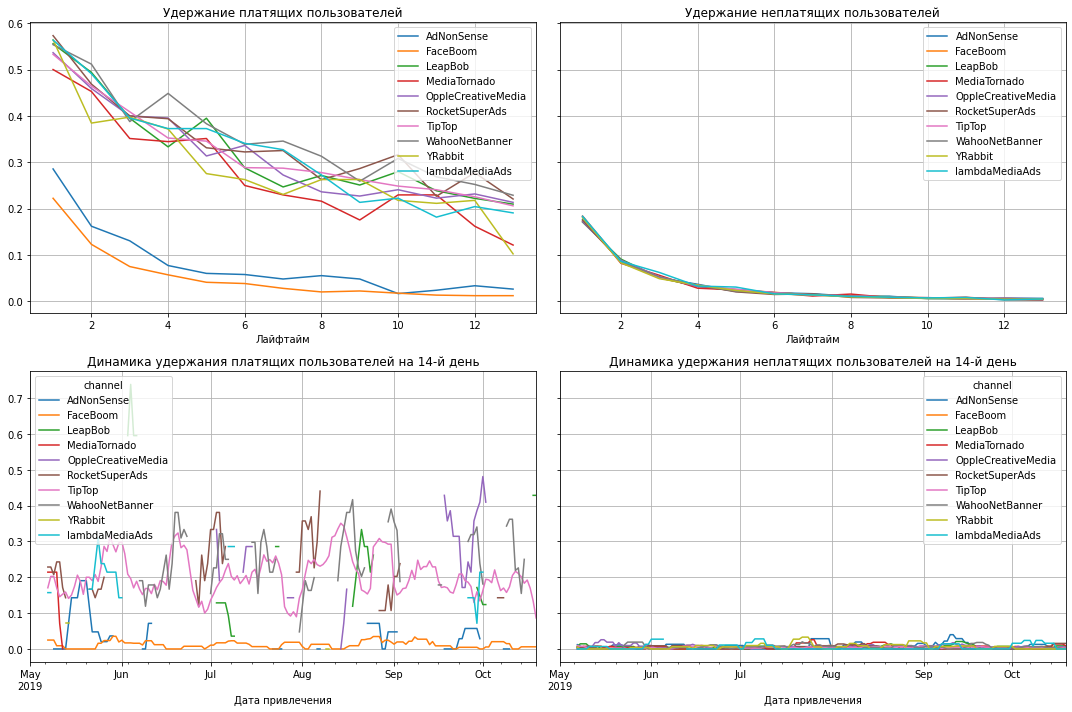

In [ ]:
# посмотрим удеражание в разбивке по каналам привлечения, исключив органических пользователей

retention_raw, retention, retention_history = get_retention(
    profiles.query('channel != "organic"'),
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)


plot_retention(retention, retention_history, horizon_days, window=7)

Наблюдаем, что удержание пользователей, пришедших из каналов FaceBoom и AdNonSense лежит в диапазоне примерно на 50% ниже чем у остальных каналов, практически на уровне неплатящих пользователей. Возможно, стоит точнее таргетировать рекламу в этих каналах. О проблеме необходимо сообщить в маркетинговый отдел.

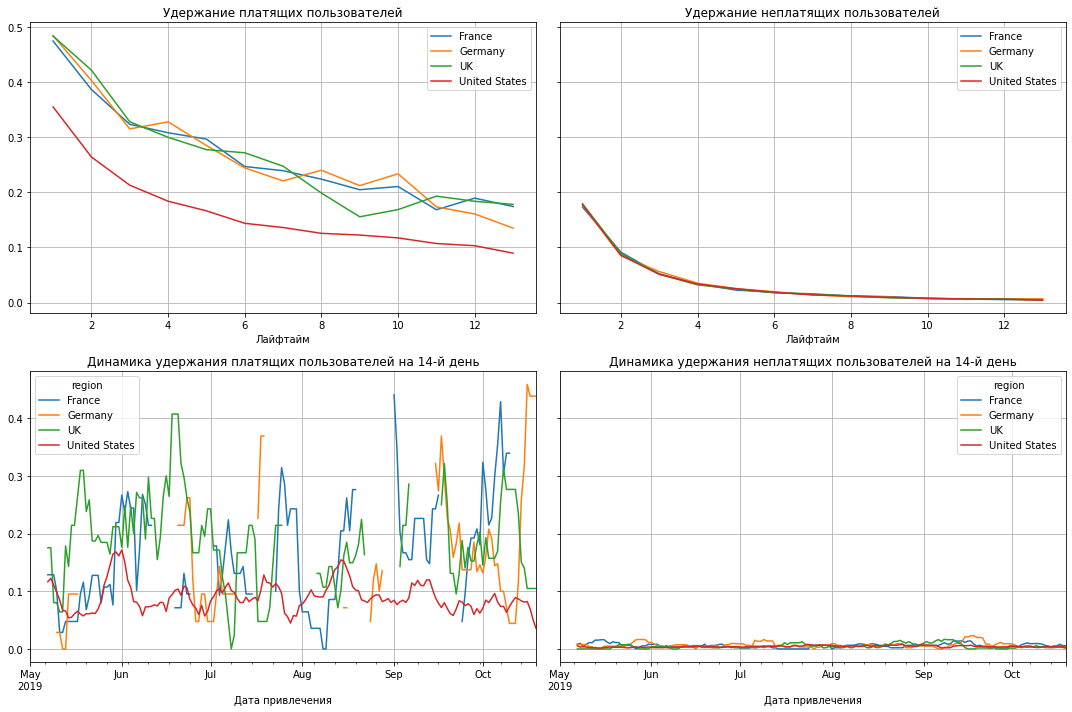

In [ ]:
# посмотрим удержание в разбивке по регионам, исключив органических пользователей

retention_raw, retention, retention_history = get_retention(
    profiles.query('channel != "organic"'),
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)


plot_retention(retention, retention_history, horizon_days, window=7)

В разбивке удержания по регионам:<br>
Наблюдаем худьшее по сравнению с другими регионами удержание платящих пользователей в США.

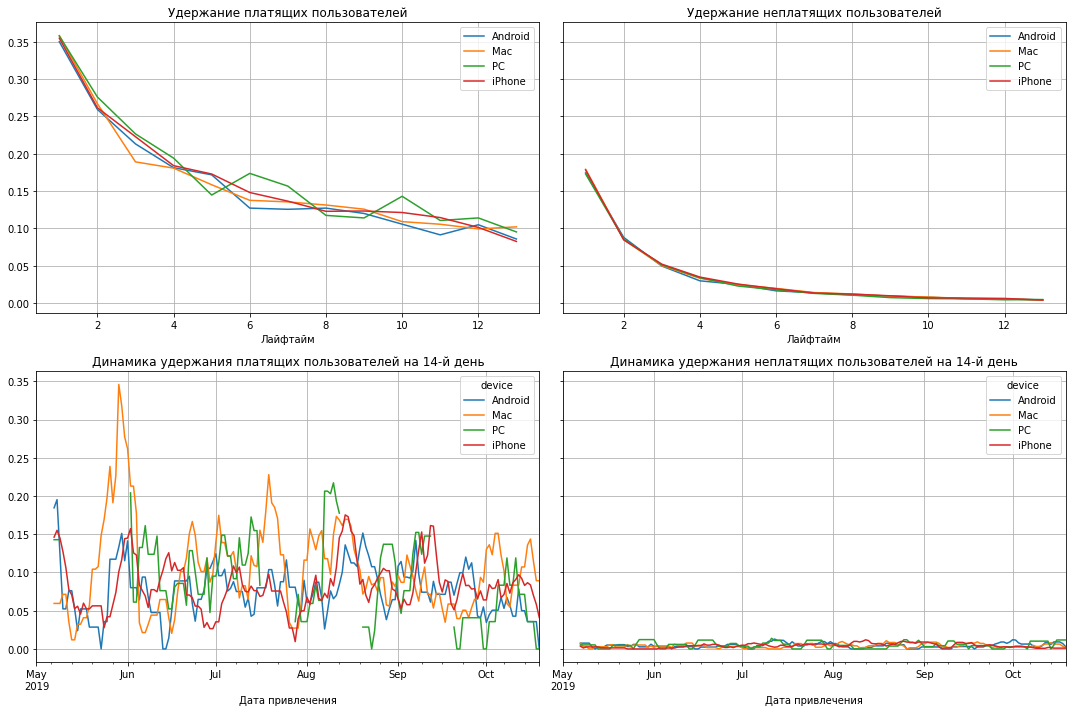

In [ ]:
# Проверим, в какой именно группе пользователей из США плохое удержание
# посмотрим США в разбивке по устройствам

retention_raw, retention, retention_history = get_retention(
    profiles.query('channel != "organic" & region=="United States"'),
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)


plot_retention(retention, retention_history, horizon_days, window=7)

По устройствам различий нет

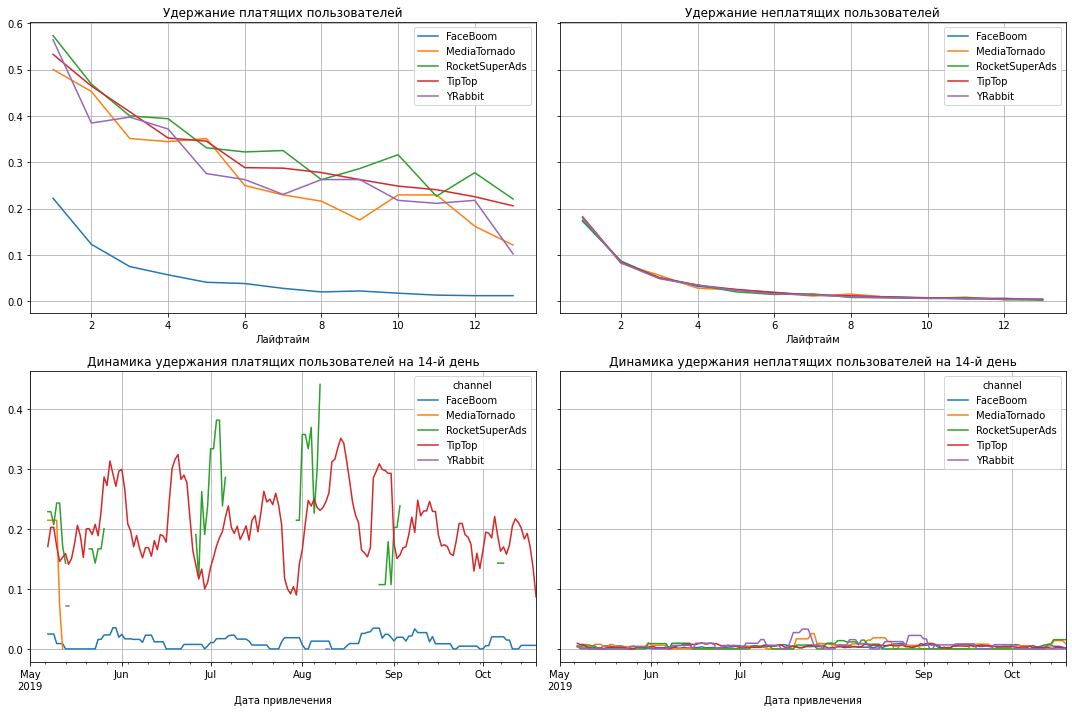

In [ ]:
# посмотрим США в разбивке по каналам

retention_raw, retention, retention_history = get_retention(
    profiles.query('channel != "organic" & region=="United States"'),
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)


plot_retention(retention, retention_history, horizon_days, window=7)

Проблема в США именно с удержанием по каналу FaceBoom

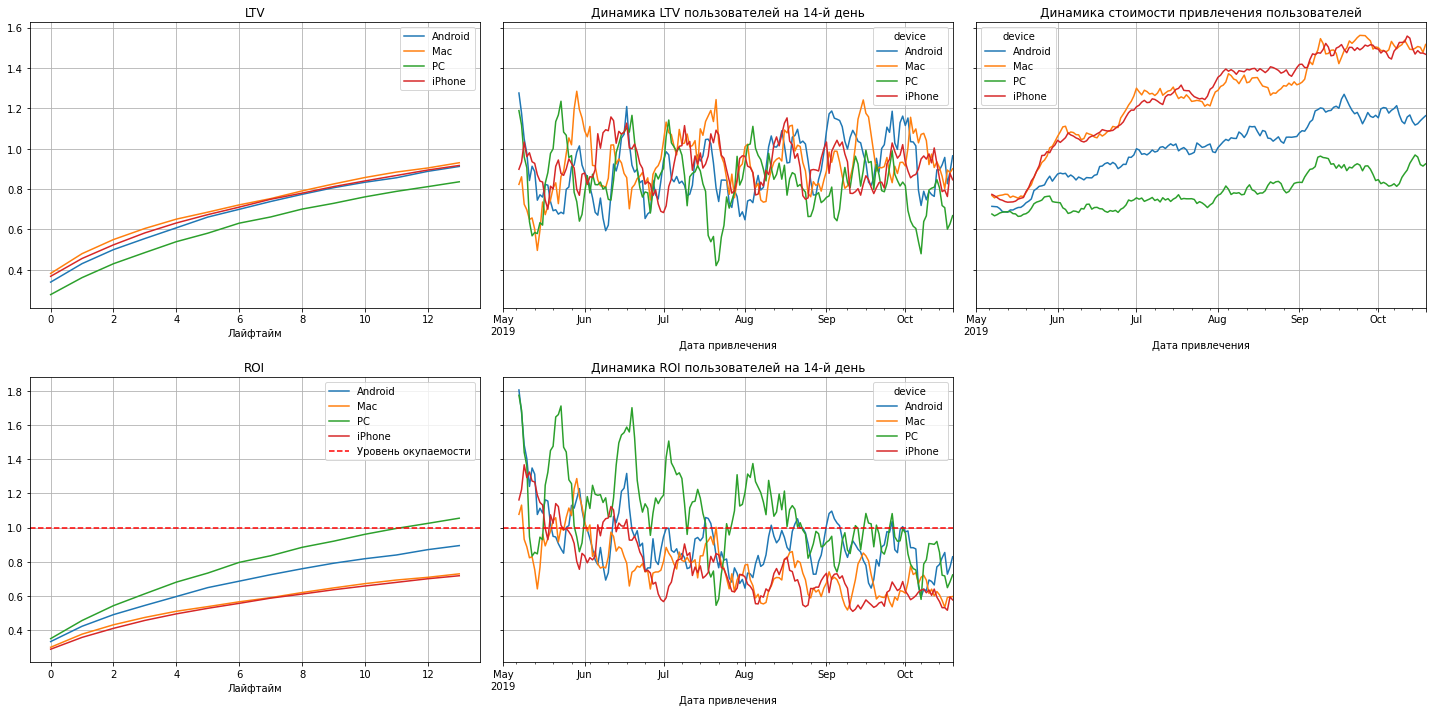

In [ ]:
# Теперь проанализируем окупаемость рекламы с разбивкой по устройствам


ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

# построим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

В разбивке по устройствам:

Cнова наблюдаем увеличение стоимости привлечения всех пользователей, особенно сильно оно видно для пользователей Mac и iPhone.<br>
Привлечение пользователей устройств Android, Mac и iPhone не окупается вообще. <br>
Привлечение пользователей PC окупается только на 14 день и довольно слабо. <br>
Пользователи всех устройств накапливают нормальный LTV, пользователи PC чуть хуже остальных. <br>
Проблема с окупаемостью началась с июня 2019 года, после этого месяца динамика пользователей Mac и iPhone упала ниже уровня окупаемости, а пользователей PC и Android также снизилась в среднем до выхода в ноль.

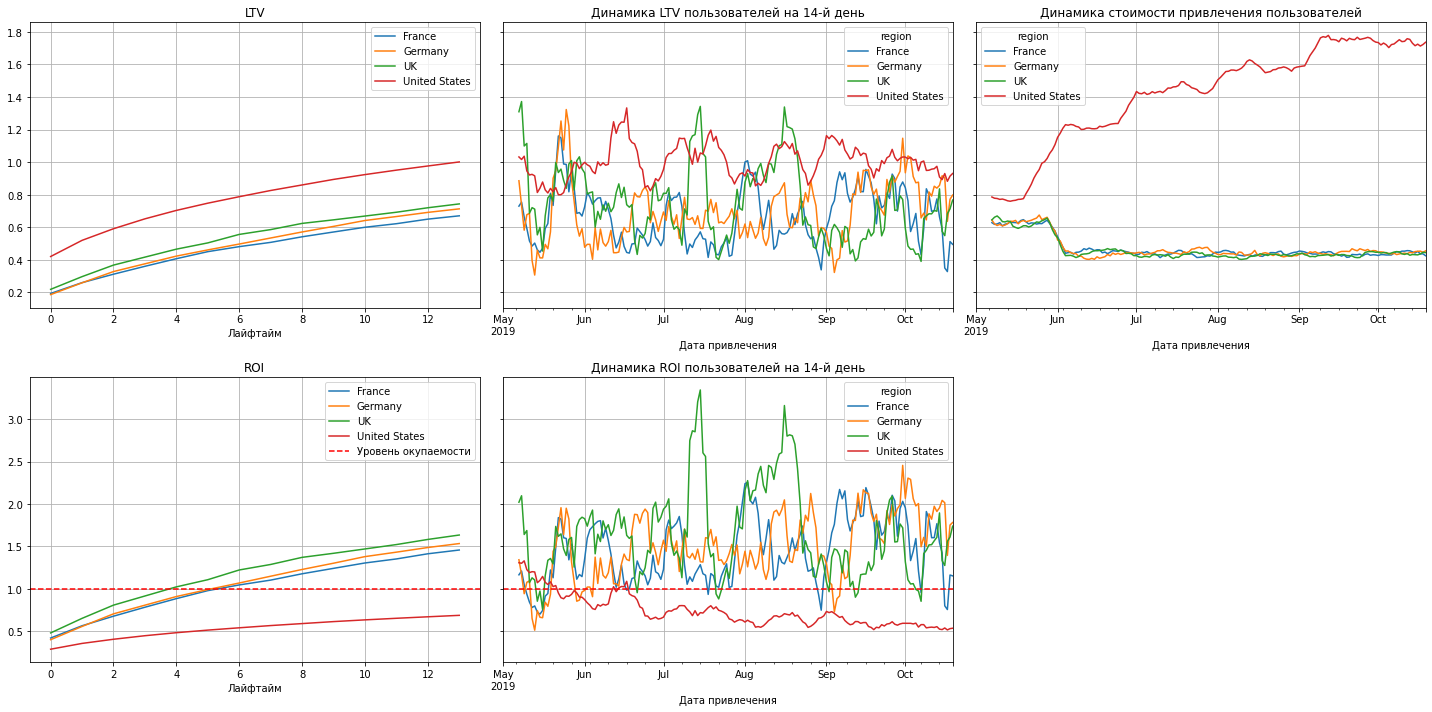

In [ ]:
# Теперь проанализируем окупаемость рекламы с разбивкой по странам


ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

# построим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Вот кажется проблема и локализована!

Наблюдаем, что привлечение пользователей не окупается только из одного региона - США.<br>
При этом данный регион наиболее интересен с точки зрения бизнеса - оттуда больше всего пользователей, и он производит наибольший LTV.<br>
Причина - резкий рост стоимости привлечения пользователей по региону с мая-июня 2019 года.<br>

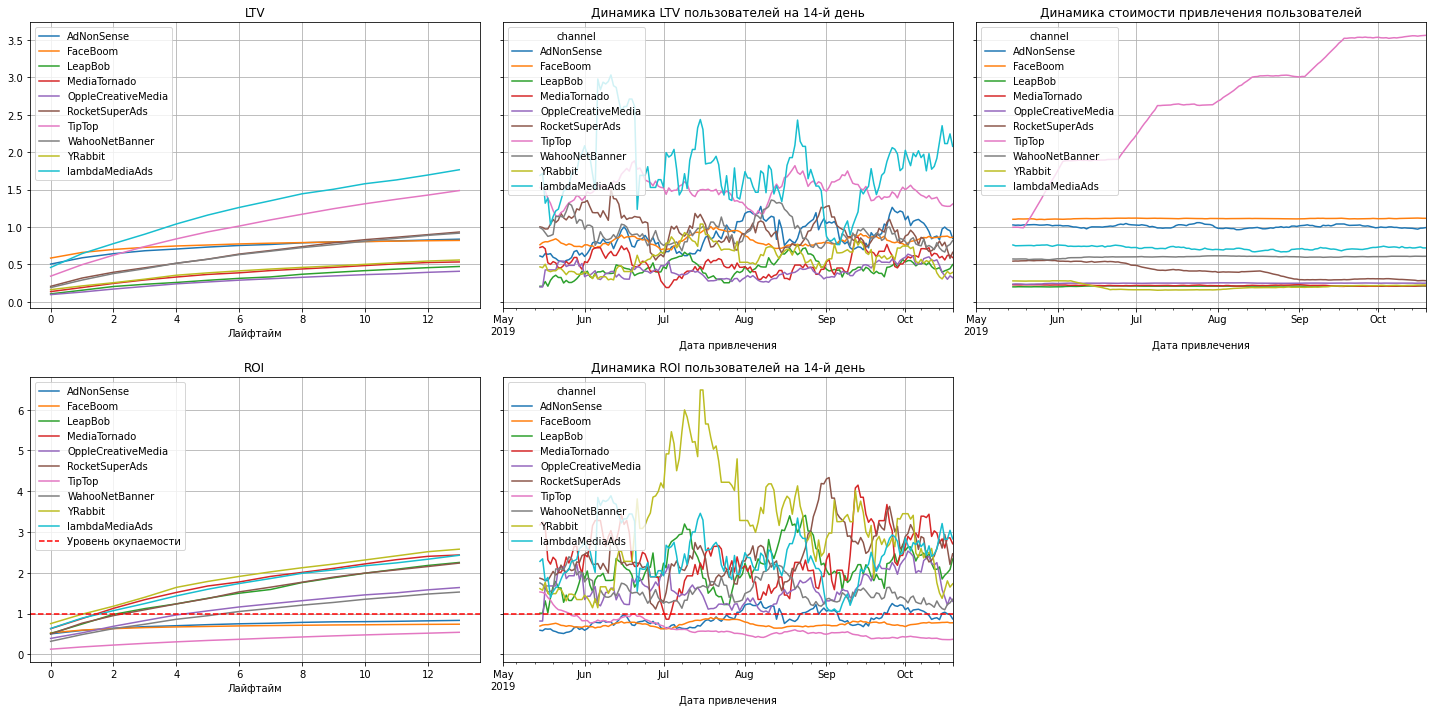

In [ ]:
# Теперь проанализируем окупаемость рекламы с разбивкой по каналам привлечения, исключив органических пользователей


ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

# построим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=15)

Не окупается реклама в каналах AdNonSense, FaceBoom и TipTop. При этом TipTop перестал окупаться именно с июня 2019 года из-за резкого роста стоимости привлечения пользователей. <br>
Стоимость привлечения пользователей по другим каналам значительно не менялась на протяжении всего исследуемого периода.

In [ ]:
# Попробуем теперь выяснить, является ли проблема больше региональной
# или же охватывает всех пользователей канала TipTop.
# для этого посмотрим, как распределеются по регионам и каналам платящие пользователи

profiles.query('channel != "organic"').pivot_table(
    index='channel', columns='region', values='user_id', aggfunc='count')

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,NaN
FaceBoom,NaN,NaN,NaN,29144.0
LeapBob,2988.0,2519.0,3046.0,NaN
MediaTornado,NaN,NaN,NaN,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,NaN
RocketSuperAds,NaN,NaN,NaN,4448.0
TipTop,NaN,NaN,NaN,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,NaN
YRabbit,NaN,NaN,NaN,4312.0


Согласно данным, платящие пользователи четко распределились по каналам по Европейскому и Американскому регионам (что удивительно). Оказалось, что все платящие пользователи наиболее проблемных сетей TipTop и FaceBoom находятся в США. На этом можно закончить исследование и сформировать конечные выводы.

### промежуточные выводы 3

Проведен анализ бизнес-показатели LTV и ROI.<br>
Момент анализа - 1 ноября 2019 года, горизонт анализа 14 дней, согласно заданию. <br>

Построив соответствующие графики, наблюдаем:<br>
- отсутствие окупаемости (ROI 0.8 к 14-му дню)
- показатель LTV экспоненциально растет на протяжении нужного лайфтайма, проблем не наблюдается
- на динамику LTV по месяцам отмечаются колебания, но в целом показатель стабилен
- стоимость привлечения странным образом растет, нужно изучить проблему
- динамика окупаемости 14-го дня падает по мере того как растет стоимость привлечения пользователя, и переходит в зону ниже уровня окупаемости 5 и 6 месяцем. Скорее всего проблема именно в CAC.


### Анализ конверсии пользователей и динамики её изменения.<br>
Конверсия плавно экспоненциально растет от начального значения (1-го дня) в направлении единицы. Динамика конверсии стабильна.<br>

#### В разбивке конверсии по регионам :<br>
Самую мощную конверсию демонстрируют пользователи из США, примерно в два раза превышает других. Остальные регионы на одном уровне.

#### В разбивке конверсии по устройствам:<br>
Наблюдаем явно плохую по сравнению с другими конверсию пользователей PC.<br> Информация для передачи в маркетинговый отдел, может что-то не так с отображением рекламы на этой платформе.

#### в разбивке конверсии по каналам продвижения:
- группа лидеров - FaceBoom, AdNonSence, lambdaMediaAds, TipTop,<br>
- группа "середнячков" - RocketSuperAds и WahooNetBanner<br>
- группа аутсайдеров - YRabbit, MediaTornado, LeapBob, OppleCreativeMedia<br>
В последней группе необходимо работать над повышением конверсии.


### Анализ удержания пользователей и динамики его изменения.<br>

Удержание плавно снижается по схожей с экспоненциальной кривой, линия для неплатящих пользователей лежит ниже линии для платящих, аномалий не наблюдается.
Диинамика удержания более-менее стабильна, но все же посмотрим на нее в разбивке на устройства и каналам привлечения, так как не очень ровный график вызвал подозрения.<br>

#### В разбивке по устройствам
Значительной разницы удержания не наблюдается, для всех устройств удержание находится в одном диапазоне.<br>

#### В разбивке по каналам привлечения
Наблюдаем, что удержание пользователей, пришедших из каналов FaceBoom и AdNonSense лежит в диапазоне примерно на 50% ниже чем у остальных каналов, практически на уровне неплатящих пользователей.<br>

 Возможно, стоит точнее таргетировать рекламу в этих каналах. О проблеме необходимо сообщить в маркетинговый отдел.

#### В разбивке удержания по регионам:<br>
Наблюдаем худьшее по сравнению с другими регионами удержание платящих пользователей в США.<br>
Вызвано плохим удержанием конкретно по каналу FaceBoom.


### Анализ окупаемости рекламы

#### В разбивке по устройствам:

Наблюдаем увеличение стоимости привлечения всех пользователей, особенно сильно оно видно для пользователей Mac и iPhone.<br>
Привлечение пользователей устройств Android, Mac и iPhone не окупается вообще. <br>
Привлечение пользователей PC окупается только на 14 день и довольно слабо. <br>
Пользователи всех устройств накапливают нормальный LTV, пользователи PC чуть хуже остальных. <br>
Проблема с окупаемостью началась с июня 2019 года, после этого месяца динамика пользователей Mac и iPhone упала ниже уровня окупаемости, а пользователей PC и Android также снизилась в среднем до выхода в ноль.

#### В разбивке по регионам:
Наблюдаем, что привлечение пользователей не окупается только из одного региона - США.<br>
При этом данный регион наиболее интересен с точки зрения бизнеса - оттуда больше всего пользователей, и он производит наибольший LTV.<br>
Причина - резкий рост стоимости привлечения пользователей по региону с мая-июня 2019 года.<br>

#### В разбивке по каналам привлечения
Наблюдаем, что не окупается реклама в каналах AdNonSense, FaceBoom и TipTop. При этом TipTop перестал окупаться именно с июня 2019 года из-за резкого роста стоимости привлечения пользователей. <br>
Стоимость привлечения пользователей по другим каналам значительно не менялась на протяжении всего исследуемого периода.<br>



### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

# Общие выводы

Проанализированы данные развлекательного приложения Procrastinate Pro+.

Заявленная проблема: <br>
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки, причины непонятны. <br>



## 1. Исследовательский анализ данных

На исследованном промежутке времени между:<br>
минимальной дата привлечения пользователей -  2019-05-01<br>
максимальной дата привлечения пользователей -  2019-10-27<br>
у приложения Procrastinate Pro+ было 150004 активных пользователя.<br>

### По странам:
Наибольшее количество пользователей 100002 из США, доля платящих также наибольшая ~ 6,9%<br>
Показатели остальных стран примерно одного порядка:<br>
Великобритания - 17575 пользователей, доля платящих ~ 4,0%<br>
Франциия - 17450 пользователей, доля платящих ~ 3,8%<br>
Германия - 14981 пользователей, доля платящих ~ 4,1%<br>

### По устройствам:
Наибольшее количество пользователей - 54479 используют iPhone, доля платящих ~ 6,2%<br>
Android - 35032 пользователей, доля платящих ~ 5,8%<br>
PC - 30455 пользователей, доля платящих ~ 5,0%<br>
Mac - 30042 пользователей, доля платящих ~ 6,4%<br>

Можем сделать вывод, что среди пользователей экосистемы устройств компании Apple доля платящих выше чем других систем.<br>

### По каналам привлечения пользователей:
Наибольшее количество пользователей пришло "органическим" путем без рекламных компаний, однако доля платящих среди них наименьшая.<br>

Из платных каналов наилучшие показатели у FaceBoom - наибольшее количество пользователей 29144 и наибольшая доля платящих ~ 12.2%<br>
На втором месте TipTop - 19561 пользователей, доля платящих ~ 9.6%<br>

Отдельно отметим качество привлеченных пользователей по каналам AdNonSense и lambdaMediaAds - доли 11.3% и 10.4% соответственно. Однако количество пользователей из этих каналов сравнительно невелико - 3880 и 2149, возможно рекламные компании по этим каналам следует расширить.<br>

Рекламным компаниям в остальных каналах есть над чем работать. Количества пришедших из них пользователей от 4312 до 8605, при долях платящих 2.7 - 7.9%<br>


## 2. Маркетинговое исследование

Всего на рекламные компании по всем каналам за исследуемый период было потрачено 105497.3 условных единиц.<br>

В разбивке <b>по каналам привлечения</b> с большим отрывом лидируют сети TipTop и FaceBoom на них приходится 51.9% и 30.7% всех затрат. <br>
На остальные 8 каналов приходится по 0.9-4.9% затрат.<br>

Наблюдаем, что затраты на все каналы кроме FaceBoom и TipTop практически не изменялись во времени. <br>
Затраты на FaceBoom увеличились в июне по отношению к маю, но затем оставались в пределах одного диапазона.<br>
Затраты же на TipTop постоянно растут. Эффективность этих затрат попробуем выяснить далее.<br>

Самая высокая средняя стоимость привлечения одного пользователя на канале TipTop ~ 2.8<br>
FaceBoom ~ 1.1 <br>
AdNonSense ~ 1.0<br>
Остальные стоимости распределены от 0.21 до 0.72 <br>

Также по графику динамики наблюдаем аномалию по каналу TipTop - средняя стоимость привлечения одного пользователя скачкообразно растет от месяца к месяцу от 1.0 в мае до 3.5 в сентябре-октябре.<br>


## 3. Оценка окупаемости рекламной кампании

Проведен анализ бизнес-показатели LTV и ROI.<br>
Момент анализа - 1 ноября 2019 года, горизонт анализа 14 дней, согласно заданию. <br>

Построив соответствующие графики, наблюдаем:<br>
- отсутствие окупаемости (ROI 0.8 к 14-му дню)
- показатель LTV экспоненциально растет на протяжении нужного лайфтайма, проблем не наблюдается
- на динамику LTV по месяцам отмечаются колебания, но в целом показатель стабилен
- стоимость привлечения странным образом растет, нужно изучить проблему
- динамика окупаемости 14-го дня падает по мере того как растет стоимость привлечения пользователя (CAC), и переходит в зону ниже уровня окупаемости 5 и 6 месяцем. Скорее всего проблема именно в CAC.


### Анализ конверсии пользователей и динамики её изменения.<br>
Конверсия плавно экспоненциально растет от начального значения (1-го дня) в направлении единицы. Динамика конверсии стабильна.<br>

#### В разбивке конверсии по регионам :<br>
Самую мощную конверсию демонстрируют пользователи из США, она примерно в два раза превышает других. Остальные регионы на одном уровне.

#### В разбивке конверсии по устройствам:<br>
Наблюдаем явно плохую по сравнению с другими конверсию пользователей PC.<br> Информация для передачи в маркетинговый отдел, может что-то не так с отображением рекламы на этой платформе.

#### в разбивке конверсии по каналам продвижения:
- группа лидеров - FaceBoom, AdNonSence, lambdaMediaAds, TipTop,<br>
- группа "середнячков" - RocketSuperAds и WahooNetBanner<br>
- группа аутсайдеров - YRabbit, MediaTornado, LeapBob, OppleCreativeMedia<br>
В последней группе необходимо работать над повышением конверсии.


### Анализ удержания пользователей и динамики его изменения.<br>

Удержание плавно снижается по схожей с экспоненциальной кривой, линия для неплатящих пользователей лежит ниже линии для платящих, аномалий не наблюдается.
Диинамика удержания более-менее стабильна, но все же посмотрим на нее в разбивке на устройства, регионы и каналы привлечения, так как не очень ровный график вызвал подозрения.<br>

#### В разбивке по устройствам
Значительной разницы удержания не наблюдается, для всех устройств удержание находится в одном диапазоне.<br>

#### В разбивке по каналам привлечения
Наблюдаем, что удержание пользователей, пришедших из каналов FaceBoom и AdNonSense лежит в диапазоне примерно на 50% ниже чем у остальных каналов, практически на уровне неплатящих пользователей.<br>

 Возможно, стоит точнее таргетировать рекламу в этих каналах. О проблеме необходимо сообщить в маркетинговый отдел.

#### В разбивке удержания по регионам:<br>
Наблюдаем худьшее по сравнению с другими регионами удержание платящих пользователей в США.<br>
Вызвано плохим удержанием конкретно по каналу FaceBoom.


### Анализ окупаемости рекламы

#### В разбивке по устройствам:

Наблюдаем увеличение стоимости привлечения всех пользователей, особенно сильно оно видно для пользователей Mac и iPhone.<br>
Привлечение пользователей устройств Android, Mac и iPhone не окупается вообще. <br>
Привлечение пользователей PC окупается только на 14 день и довольно слабо. <br>
Пользователи всех устройств накапливают нормальный LTV, пользователи PC чуть хуже остальных. <br>
Проблема с окупаемостью началась с июня 2019 года, после этого месяца динамика пользователей Mac и iPhone упала ниже уровня окупаемости, а пользователей PC и Android также снизилась в среднем до выхода в ноль.

#### В разбивке по регионам:
Наблюдаем, что привлечение пользователей не окупается только из одного региона - США.<br>
При этом данный регион наиболее интересен с точки зрения бизнеса - оттуда больше всего пользователей, и он производит наибольший LTV.<br>
Причина - резкий рост стоимости привлечения пользователей по региону с мая-июня 2019 года.<br>

#### В разбивке по каналам привлечения
Наблюдаем, что не окупается реклама в каналах AdNonSense, FaceBoom и TipTop. При этом TipTop перестал окупаться именно с июня 2019 года из-за резкого роста стоимости привлечения пользователей. <br>
Стоимость привлечения пользователей по другим каналам значительно не менялась на протяжении всего исследуемого периода.<br>



## 4. рекомендации для отдела маркетинга

В ходе анализа обнаружились следующие основные проблемы:<br>
1. Не окупается рекламная компания в канлах AdNonSense, FaceBoom и TipTop.
При этом пользователи, приходящие с каналов FaceBoom и TipTop являются ключевыми для бизнеса как по своему количеству, так и по качеству (наибольшие доли платящих).<br>

- Проблема с окупаемостью рекламы канала FaceBoom носила постоянный характер, уровень окупаемости не был достигнут на исследуемом периоды. Причина - низкое удержание пользователей (примерно на 50% ниже чем у остальных каналов). Рекомендовано рассмотреть возможность повысить данный параметр.<br>

- Проблема с окупаемостью рекламы канала TipTop началась с мая/июня 2019 года, именно в этот динамика окупаемости пользователей по каналу TipTop упала ниже уровня окупаемости. Причина - резкое увеличение стоимости привлечения пользователя. Рекомендовано проанализировать изменения в рекламной кампании на канале TipTop в период май-июнь 2019 года.

2. Наблюдаем худшую по сравнению с другими конверсию пользователей платформы PC. Рекомендация повысить параметр.

3. В разбивке конверсии по каналам продвижения есть группа аутсайдеров - YRabbit, MediaTornado, LeapBob, OppleCreativeMedia - в этих каналах необходимо работать над повышением конверсии.

4. Отдельно отметим качество привлеченных пользователей по каналам AdNonSense и lambdaMediaAds - доли покупающих среди них 11.3% и 10.4% соответственно. Однако количество пользователей из этих каналов сравнительно невелико - 3880 и 2149, возможно рекламные компании по этим каналам следует расширить.

    При этом удержание пользователей, пришедших из канала AdNonSense (как и у FaceBoom) лежит в диапазоне примерно на 50% ниже чем у остальных каналов, практически на уровне неплатящих пользователей.<br> Рекомендовано рассмтотреть возможности улучшения этого показателя.

5. Пользователи, пришедшие из канлов RocketSuperAds из США и WahooNetBanner из Европы демонстрируют хорошие конверсии, рекомендовано расширить рекламные компании по этим направлениям.